In [1]:
#tutorial from: https://rpubs.com/phiggins/461686
#package list below created by trial and error

#import tibble for working with dataframes
library(tibble)

#from tutorial
library(magrittr)

#import ggplot for visualization
library(ggplot2)

In [3]:
install.packages("svglite")

also installing the dependencies ‘systemfonts’, ‘gdtools’, ‘BH’


Warning message in install.packages("svglite"):
“installation of package ‘systemfonts’ had non-zero exit status”
Warning message in install.packages("svglite"):
“installation of package ‘gdtools’ had non-zero exit status”
Warning message in install.packages("svglite"):
“installation of package ‘svglite’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



Saving 6.67 x 6.67 in image



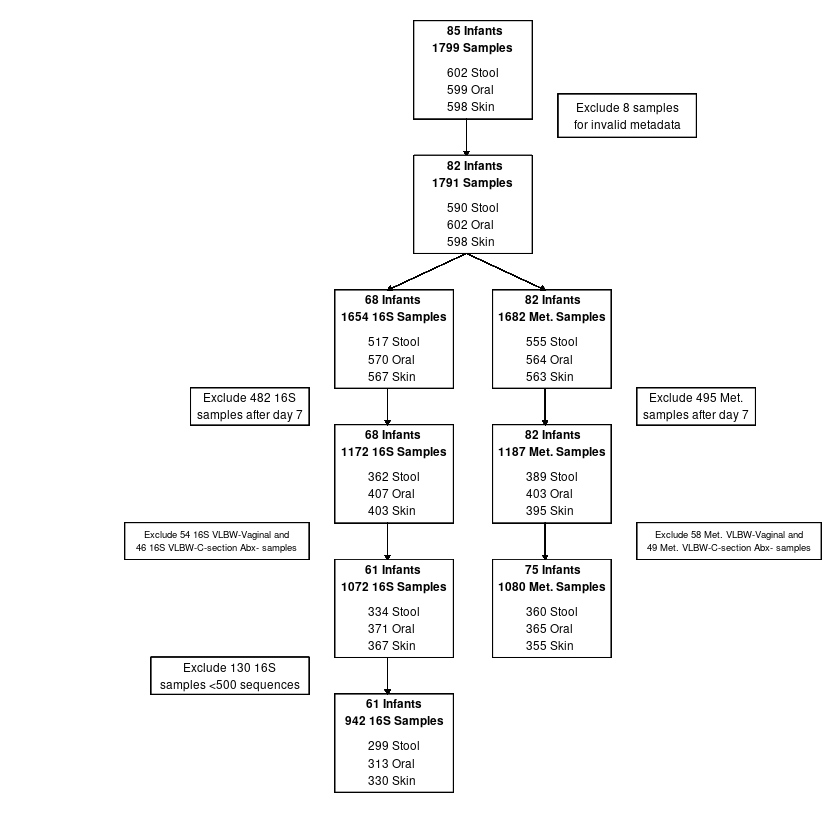

In [16]:
#create toy data
data <- tibble(x= -10:100, y= -10:100)

data %>% 
  ggplot(aes(x, y)) + 
  scale_x_continuous(minor_breaks = seq(-10, 100, 10)) + 
  scale_y_continuous(minor_breaks = seq(-10, 100, 10)) +
  theme_linedraw() ->
  p

arrow_y_len <- 6
box_height <- 16
box_width <- 18
left_col_left <- 30
right_col_left <- 54
left_col_mid <- left_col_left + 8
right_col_mid <- right_col_left + 8
text_y_offset <- 12
text_x_offset <- box_width/2


filter_box_offset  <- 4
filter_box_1_width <- 21
filter_box_2_width <- 18
filter_box_3_width <- 28
filter_box_4_width <- 24


#BOX 1
lab <- 'atop(bold("     85 Infants\n1799 Samples\n\n"),
"602 Stool
599 Oral
598 Skin")'
top <- 104
left <- 42
p <- p +
  geom_rect(xmin = left, xmax=left+box_width, ymin=top-box_height, ymax=top, color='black',
            fill='white', size=0.25) +
  annotate('text', x= left+text_x_offset, y=top-text_y_offset, label=lab, size=2.5, parse=TRUE)
#ARROW 1 ->2
p <- p + geom_segment(
    x=50, xend=50, y=top-box_height, yend=top-box_height-arrow_y_len, 
    size=0.15, linejoin = "mitre", lineend = "butt",
    arrow = arrow(length = unit(1, "mm"), type= "closed"))

#FILTER 1->2 Invalid metadata
filter_box_left <- left + box_width + filter_box_offset
filter_box_right <- filter_box_left + filter_box_1_width
filter_box_mid <- filter_box_left + (filter_box_1_width)/2

lab <- "Exclude 8 samples\nfor invalid metadata"
p <- p +geom_rect(xmin=filter_box_left, xmax=filter_box_right, ymin=85, ymax=92, color='black',
            fill='white', size=0.25) +
  annotate('text', x= filter_box_mid, y=88.5, label=lab, size=2.5)

#BOX 2
top <- top-box_height-arrow_y_len
lab <- 'atop(bold("     82 Infants\n1791 Samples\n\n"),
"590 Stool
602 Oral
598 Skin")'
p <- p +
  geom_rect(xmin = left, xmax=left+box_width, ymin=top-box_height, ymax=top, color='black',
            fill='white', size=0.25) +
  annotate('text', x= left+text_x_offset, y=top-text_y_offset, label=lab, size=2.5, parse=TRUE)


#BOX 16S 3
top <- top-box_height-arrow_y_len
left <- left_col_left
lab <- 'atop(bold("        68 Infants\n1654 16S Samples\n\n"),
"517 Stool
570 Oral
567 Skin")'
p <- p +
  geom_rect(xmin = left, xmax=left+box_width, ymin=top-box_height, ymax=top, color='black',
            fill='white', size=0.25) +
  annotate('text', x= left+text_x_offset, y=top-text_y_offset, label=lab, size=2.5, parse=TRUE)


#ARROW 2 -> 16S-3
p <- p + geom_segment(
    x=50, xend=left_col_mid, y=top+arrow_y_len, yend=top, 
    size=0.15, linejoin = "mitre", lineend = "butt",
    arrow = arrow(length = unit(1, "mm"), type= "closed"))


#BOX MET 3
left <- right_col_left
lab <- 'atop(bold("         82 Infants\n1682 Met. Samples\n\n"),
"555 Stool
564 Oral
563 Skin")'
p <- p +
  geom_rect(xmin = left, xmax=left+box_width, ymin=top-box_height, ymax=top, color='black',
            fill='white', size=0.25) +
  annotate('text', x= left+text_x_offset, y=top-text_y_offset, label=lab, size=2.5, parse=TRUE)


#ARROW 2 -> MET-3
p <- p + geom_segment(
    x=50, xend=right_col_mid, y=top+arrow_y_len, yend=top, 
    size=0.15, linejoin = "mitre", lineend = "butt",
    arrow = arrow(length = unit(1, "mm"), type= "closed"))

#BOX 16S 4
top <- top-box_height-arrow_y_len
left <- left_col_left
lab <- 'atop(bold("        68 Infants\n1172 16S Samples\n\n"),
"362 Stool
407 Oral
403 Skin")'
p <- p +
  geom_rect(xmin = left, xmax=left+box_width, ymin=top-box_height, ymax=top, color='black',
            fill='white', size=0.25) +
  annotate('text', x= left+text_x_offset, y=top-text_y_offset, label=lab, size=2.5, parse=TRUE)

#ARROW 16S-3 -> 16S-4
p <- p + geom_segment(
    x=left_col_mid, xend=left_col_mid, y=top+arrow_y_len, yend=top, 
    size=0.15, linejoin = "mitre", lineend = "butt",
    arrow = arrow(length = unit(1, "mm"), type= "closed"))

#Filter 16S age range (16S-3 -> 16S-4)
filter_box_right <- left - filter_box_offset
filter_box_left <- filter_box_right - filter_box_2_width
filter_box_mid <- filter_box_left + (filter_box_2_width)/2
lab <- "Exclude 482 16S\nsamples after day 7"
p <- p +geom_rect(xmin=filter_box_left, xmax=filter_box_right, ymin=top+arrow_y_len, ymax=top, color='black',
            fill='white', size=0.25) +
  annotate('text', x= filter_box_mid, y=top+3, label=lab, size=2.5)

#BOX MET 4
left <- right_col_left
lab <- 'atop(bold("         82 Infants\n1187 Met. Samples\n\n"),
"389 Stool
403 Oral
395 Skin")'
p <- p +
  geom_rect(xmin = left, xmax=left+box_width, ymin=top-box_height, ymax=top, color='black',
            fill='white', size=0.25) +
  annotate('text', x= left+text_x_offset, y=top-text_y_offset, label=lab, size=2.5, parse=TRUE)

#ARROW MET-3 -> MET-4
p <- p + geom_segment(
    x=right_col_mid, xend=right_col_mid, y=top+arrow_y_len, yend=top, 
    size=0.15, linejoin = "mitre", lineend = "butt",
    arrow = arrow(length = unit(1, "mm"), type= "closed"))

#Filter Met age range (MET-3 -> MET-4)
lab <- "Exclude 495 Met.\nsamples after day 7"
filter_box_left <- left +box_width + filter_box_offset
filter_box_right <- filter_box_left + filter_box_2_width
filter_box_mid <- filter_box_left + (filter_box_2_width)/2
p <- p +geom_rect(xmin=filter_box_left, xmax=filter_box_right, ymin=top+arrow_y_len, ymax=top, color='black',
            fill='white', size=0.25) +
  annotate('text', x= filter_box_mid, y=top+3, label=lab, size=2.5)

#BOX 16S 5
top <- top-box_height-arrow_y_len
left <- left_col_left
lab <- 'atop(bold("        61 Infants\n1072 16S Samples\n\n"),
"334 Stool
371 Oral
367 Skin")'
p <- p +
  geom_rect(xmin = left, xmax=left+box_width, ymin=top-box_height, ymax=top, color='black',
            fill='white', size=0.25) +
  annotate('text', x= left+text_x_offset, y=top-text_y_offset, label=lab, size=2.5, parse=TRUE)

#ARROW 16S-4 -> 16S-5
p <- p + geom_segment(
    x=left_col_mid, xend=left_col_mid, y=top+arrow_y_len, yend=top, 
    size=0.15, linejoin = "mitre", lineend = "butt",
    arrow = arrow(length = unit(1, "mm"), type= "closed"))

#Filter 16S cohort (16S-4 -> 16S-5)
filter_box_right <- left - filter_box_offset
filter_box_left <- filter_box_right - filter_box_3_width
filter_box_mid <- filter_box_left + (filter_box_3_width)/2

lab <- "Exclude 54 16S VLBW-Vaginal and
46 16S VLBW-C-section Abx- samples"
p <- p +geom_rect(xmin=filter_box_left, xmax=filter_box_right, ymin=top+arrow_y_len, ymax=top, color='black',
            fill='white', size=0.25) +
  annotate('text', x= filter_box_mid, y=top+3, label=lab, size=2)

#BOX MET 5
left <- right_col_left
lab <- 'atop(bold("         75 Infants\n1080 Met. Samples\n\n"),
"360 Stool
365 Oral
355 Skin")'
p <- p +
  geom_rect(xmin = left, xmax=left+box_width, ymin=top-box_height, ymax=top, color='black',
            fill='white', size=0.25) +
  annotate('text', x= left+text_x_offset, y=top-text_y_offset, label=lab, size=2.5, parse=TRUE)

#ARROW MET-4 -> MET-5
p <- p + geom_segment(
    x=right_col_mid, xend=right_col_mid, y=top+arrow_y_len, yend=top, 
    size=0.15, linejoin = "mitre", lineend = "butt",
    arrow = arrow(length = unit(1, "mm"), type= "closed"))

#Filter Met cohort (Met-4 -> Met-5)

filter_box_left <- left + box_width + filter_box_offset
filter_box_right <- filter_box_left + filter_box_3_width
filter_box_mid <- filter_box_left + (filter_box_3_width)/2

lab <- "Exclude 58 Met. VLBW-Vaginal and
49 Met. VLBW-C-section Abx- samples"
p <- p +geom_rect(xmin=filter_box_left, xmax=filter_box_right, ymin=top+arrow_y_len, ymax=top, color='black',
            fill='white', size=0.25) +
  annotate('text', x= filter_box_mid, y=top+3, label=lab, size=2)

#BOX 16S 6
top <- top-box_height-arrow_y_len
left <- left_col_left
lab <- 'atop(bold("       61 Infants\n942 16S Samples\n\n"),
"299 Stool
313 Oral
330 Skin")'
p <- p +
  geom_rect(xmin = left, xmax=left+box_width, ymin=top-box_height, ymax=top, color='black',
            fill='white', size=0.25) +
  annotate('text', x= left+text_x_offset, y=top-text_y_offset, label=lab, size=2.5, parse=TRUE)

#ARROW 16S-5 -> 16S-6
p <- p + geom_segment(
    x=left_col_mid, xend=left_col_mid, y=top+arrow_y_len, yend=top, 
    size=0.15, linejoin = "mitre", lineend = "butt",
    arrow = arrow(length = unit(1, "mm"), type= "closed"))

#Filter 16S min hits (16S-5 -> 16S-6)
filter_box_right <- left - filter_box_offset
filter_box_left <- filter_box_right - filter_box_4_width
filter_box_mid <- filter_box_left + (filter_box_4_width)/2

lab <- "Exclude 130 16S\nsamples <500 sequences"
p <- p +geom_rect(xmin=filter_box_left, xmax=filter_box_right, ymin=top+arrow_y_len, ymax=top, color='black',
            fill='white', size=0.25) +
  annotate('text', x= filter_box_mid, y=top+3, label=lab, size=2.5)

p <- p + theme(panel.grid = element_blank(),
               panel.border = element_blank(),
               axis.text=element_blank(),
        axis.ticks=element_blank()) +
labs(x='',y='')

out_name="/projects/cmi_proj/seed_grants/Infant_Studies/Jae_Kim/nature_med_consolidated_analyses/results/figures/consort.png"
ggsave(out_name, p, device="png")
p

In [189]:
dir()

[1] "20200604_metadata_cleanup.ipynb" "consort_diagram.ipynb"          
[3] "exploratory_metabolomics.ipynb"  "Import_vaginal_samples.ipynb"   
[5] "Infant_16S_diversity.ipynb"      "Metabolomics.ipynb"             
[7] "mmvec.ipynb"                     "sourcetracker.ipynb"            
[9] "utils"

In [192]:
ggsave(filename="/projects/cmi_proj/seed_grants/Infant_Studies/Jae_Kim/nature_med_consolidated_analyses/results/figures/consort_diagram.pdf", 
     plot=p,
     dpi=300)


Saving 6.67 x 6.67 in image

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“font metrics unknown for character 0xa”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“font metrics unknown for character 0xa”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“font metrics unknown for character 0xa”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“font metrics unknown for character 0xa”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“font metrics unknown for character 0xa”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“font metrics unknown for character 0xa”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“font metrics unknown for character 0xa”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“fon

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“font metrics unknown for character 0xa”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“font metrics unknown for character 0xa”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“font metrics unknown for character 0xa”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“font metrics unknown for character 0xa”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“font metrics unknown for character 0xa”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“font metrics unknown for character 0xa”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“font metrics unknown for character 0xa”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“font metrics unknown for charact

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“font metrics unknown for character 0xa”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“font metrics unknown for character 0xa”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“font metrics unknown for character 0xa”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“font metrics unknown for character 0xa”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“font metrics unknown for character 0xa”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“font metrics unknown for character 0xa”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“font metrics unknown for character 0xa”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“font metrics unknown for charact